<a href="https://colab.research.google.com/github/shikhaguptadr/ML-PROJECTS/blob/main/Linear_Regression_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <u> Implementing Multiple Linear Regression </u>

### <u> Objective </u>
* ### To predict the profit made by a startup on the basis of expenses incurred and the state where they operate

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error,mean_absolute_percentage_error

In [ ]:
path = '/content/drive/MyDrive/Colab Notebooks/Toppers Acadmy Data/data/Machine Learning/Chapter 1:- ML Appetizer/Day 4/Copy of 50_Startups.csv'
df = pd.read_csv(path)
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


## **EDA**

Text(0, 0.5, 'Profit')

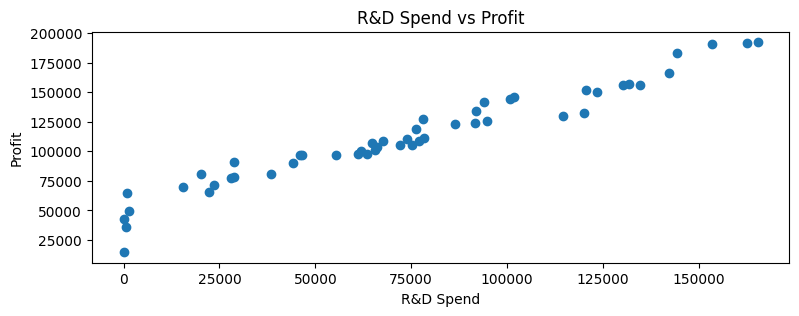

In [ ]:
plt.figure(figsize=(9,3))
plt.scatter(df['R&D Spend'],df['Profit'])
plt.title('R&D Spend vs Profit')
plt.xlabel('R&D Spend')
plt.ylabel('Profit')

Text(0, 0.5, 'Profit')

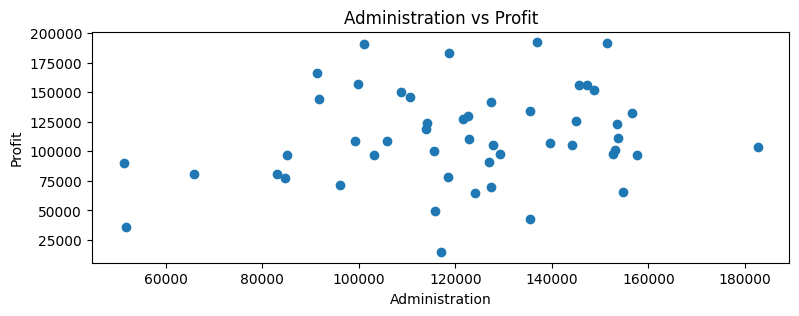

In [ ]:
plt.figure(figsize=(9,3))
plt.scatter(df['Administration'],df['Profit'])
plt.title('Administration vs Profit')
plt.xlabel('Administration')
plt.ylabel('Profit')

Text(0, 0.5, 'Profit')

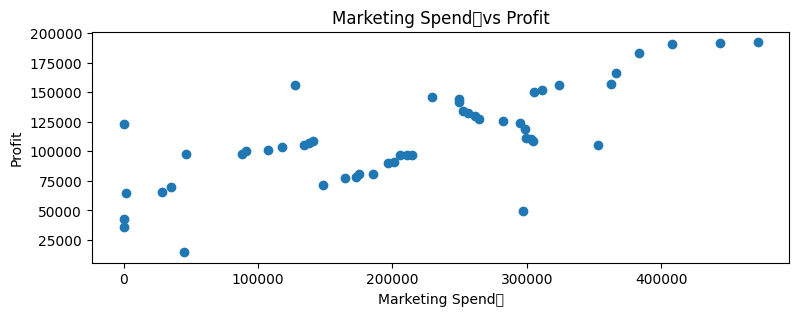

In [ ]:
plt.figure(figsize=(9,3))
plt.scatter(df['Marketing Spend'],df['Profit'])
plt.title('Marketing Spend	vs Profit')
plt.xlabel('Marketing Spend	')
plt.ylabel('Profit')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [ ]:
df['State'].value_counts()

,count
State,
New York,17
California,17
Florida,16


Text(0, 0.5, 'count')

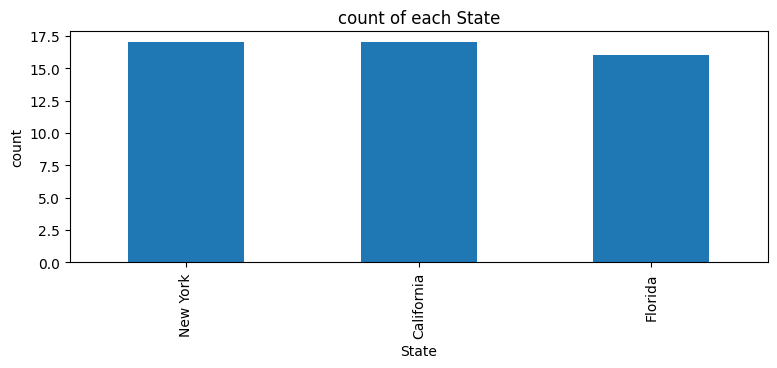

In [ ]:
bar_plot = df['State'].value_counts()
plt.figure(figsize=(9,3))
bar_plot.plot(kind='bar')
plt.title('count of each State')
plt.xlabel('State')
plt.ylabel('count')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [ ]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [ ]:
# state
# New York    - 0
# California  - 1
# Florida     - 2
# New York
# Florida

In [ ]:
# label encoding
  # state
  # 0
  # 1
  # 2
  # 0
  # 2

In [ ]:
# Column Encoding
#     New York_state      California_state    Florida_state
            1                     0                 0
            0                     1                 0
            0                     0                 1

In [ ]:
df['New_York_state'] = np.where(df['State'] == 'New York',1,0)
df['California_state'] = np.where(df['State'] == 'California',1,0)
df['Florida_state'] = np.where(df['State'] == 'Florida',1,0)
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit,New_York_state,California_state,Florida_state
0,165349.20,136897.80,471784.10,New York,192261.83,1,0,0
1,162597.70,151377.59,443898.53,California,191792.06,0,1,0
2,153441.51,101145.55,407934.54,Florida,191050.39,0,0,1
3,144372.41,118671.85,383199.62,New York,182901.99,1,0,0
4,142107.34,91391.77,366168.42,Florida,166187.94,0,0,1


In [ ]:
df.drop(columns = ['State'],axis = 1,inplace = True)

In [ ]:
df.head()

,R&D Spend,Administration,Marketing Spend,Profit,New_York_state,California_state,Florida_state
0,165349.20,136897.80,471784.10,192261.83,1,0,0
1,162597.70,151377.59,443898.53,191792.06,0,1,0
2,153441.51,101145.55,407934.54,191050.39,0,0,1
3,144372.41,118671.85,383199.62,182901.99,1,0,0
4,142107.34,91391.77,366168.42,166187.94,0,0,1


In [ ]:
df.isnull().sum()

,0
R&D Spend,0
Administration,0
Marketing Spend,0
Profit,0
New_York_state,0
California_state,0
Florida_state,0


In [ ]:
x = df.drop(columns = ['Profit'],axis = 1)
y = df['Profit']
x.head()

,R&D Spend,Administration,Marketing Spend,New_York_state,California_state,Florida_state
0,165349.20,136897.80,471784.10,1,0,0
1,162597.70,151377.59,443898.53,0,1,0
2,153441.51,101145.55,407934.54,0,0,1
3,144372.41,118671.85,383199.62,1,0,0
4,142107.34,91391.77,366168.42,0,0,1


In [ ]:
y.head()

,Profit
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94


In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)

In [ ]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [ ]:
model.coef_

array([ 8.05630064e-01, -6.87878823e-02,  2.98554429e-02, -3.08272495e+02,
       -3.15260255e+02,  6.23532751e+02])

In [ ]:
train_pred = model.predict(x_train)
train_pred[:5]

array([129287.25932268, 174098.25202593,  91886.85822583, 150220.99659018,
       173623.19035613])

In [ ]:
y_train.head()

,Profit
12,141585.52
4,166187.94
37,89949.14
8,152211.77
3,182901.99


In [ ]:
test_pred = model.predict(x_test)
test_pred[:5]

array([126362.87908255,  84608.45383633,  99677.49425146,  46357.46068582,
       128750.48288505])

In [ ]:
y_test.head()

,Profit
13,134307.35
39,81005.76
30,99937.59
45,64926.08
17,125370.37


In [ ]:
print('Train data Mean Absolute Error :- ',mean_absolute_error(y_train,train_pred))
print('Train data Mean Squared Error :- ',mean_squared_error(y_train,train_pred))
print('Train data Root Mean Squared Error :- ',np.sqrt(mean_squared_error(y_train,train_pred)))
print('Train data Mean Absolute Percentage Error :- ',mean_absolute_percentage_error(y_train,train_pred)*100)

Train data Mean Absolute Error :-  6662.656240897503
Train data Mean Squared Error :-  79700060.08259319
Train data Root Mean Squared Error :-  8927.489013300055
Train data Mean Absolute Percentage Error :-  10.947756972103429


In [ ]:
print('Test data Mean Absolute Error :- ',mean_absolute_error(y_test,test_pred))
print('Test data Mean Squared Error :- ',mean_squared_error(y_test,test_pred))
print('Test data Root Mean Squared Error :- ',np.sqrt(mean_squared_error(y_test,test_pred)))
print('Test data Mean Absolute Percentage Error :- ',mean_absolute_percentage_error(y_test,test_pred)*100)

Test data Mean Absolute Error :-  6961.477813250242
Test data Mean Squared Error :-  82010363.0442354
Test data Root Mean Squared Error :-  9055.957323454842
Test data Mean Absolute Percentage Error :-  10.278189896347753
